<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/HW8/HW8_RandomForest_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following the paper "Examining the feasibility of using open data to benchmark building energy usage in cities: A data science and policy perspective" [Roth et al 2019](https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective), choose 2 cities in the dataset available through the paper's github repository https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking

This paper is an excellent example of reproducible research. 

I also created an example of using random forest classifier and regressors here https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemos/COVID19LOS_featureExtractionRFexample.ipynb and there are links at the bottom of this notebook to useful functions and examples on the internet of applications of methods you will need to use.

1. Read the introduction to the paper and describe here (briefly) the goals of their analysis (and the analysis that you are about to reproduce). Max 200 words.
2. Choose 2 cities (any 2 cities except Seattle cause I am running some of the Seattle analysis below for guidance)
3. For each of the 2 cities reproduce their analysis by 

  3.1 gathering the original data from their repository (see below for Seattle example)

  3.2 clean the data according to their data preparation scheme, including one-hot-encoding categorical variables, except to impute missing data using KNearestNeighors instead of Gibbs sampling (see below)

  3.3 run a Random Forest (RF) Regressor to predict the total energy consumption.

  3.4 evaluate the RF model performance by printing the R2 score (the default score in SKLearn RF) for training and test set (discuss)

  3.5 plot the features sorted by their importance and identify the most important features. are they consistent between the 2 cities? are they consistent with the paper's result?
4 compare the result for the 2 cities (discuss)

5. Extra credit: 

  5.1 modify the target variable to a binary variable choosing the median of the variable values as the the energy threshold and predict whether the value is higher or lower than the threshold
  5.2 Run a Random Forest Classifier to predict if an observation is in the upper 50% percentile or lower 50% percentile (above or below the median threshold)
  5.3 Measure the performance of the model on training and test data
  5.4 Measure the feature importance and assess if the important feature have changed (discuss)

In [ ]:
import pandas as pd

# choose a city and read in the data

In [ ]:
seattle = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/Seattle/2016_Building_Energy_Benchmarking.csv")

# inspect the dataframe

In [ ]:
seattle.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


# Clean the data 
follow closely the second paragraph of Section 4 DATA. Name each step you do accordingly to the description in the paragraf
https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective 

you can also help yourself inspecting the final datasets posted on the github repo but name each action according to the paper narrative: for example, if you drop "Building ID" indicate that this is done as part of 
_We then cleaned the datasets by removing irrelevant building-identifying features (such as
address)_, or if dropping a variable with too many missing values _removing features that had missing values for greater than 40% of the buildings in the dataset._

In [ ]:
# summarize the number of rows with missing values for each column
for c in seattle.columns:
  
  # count number of rows with missing values
  n_miss = seattle[c].isnull().sum()
  perc = n_miss / seattle.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, seattle[c].dtype, 
                                                  n_miss, perc))


OSEBuildingID (int64): > 56, Missing: 0 (0.0%)
DataYear (int64): > 56, Missing: 0 (0.0%)
BuildingType (object): > 56, Missing: 0 (0.0%)
PrimaryPropertyType (object): > 56, Missing: 0 (0.0%)
PropertyName (object): > 56, Missing: 0 (0.0%)
Address (object): > 56, Missing: 0 (0.0%)
City (object): > 56, Missing: 0 (0.0%)
State (object): > 56, Missing: 0 (0.0%)
ZipCode (float64): > 56, Missing: 16 (0.5%)
TaxParcelIdentificationNumber (object): > 56, Missing: 0 (0.0%)
CouncilDistrictCode (int64): > 56, Missing: 0 (0.0%)
Neighborhood (object): > 56, Missing: 0 (0.0%)
Latitude (float64): > 56, Missing: 0 (0.0%)
Longitude (float64): > 56, Missing: 0 (0.0%)
YearBuilt (int64): > 56, Missing: 0 (0.0%)
NumberofBuildings (float64): > 56, Missing: 3 (0.1%)
NumberofFloors (int64): > 56, Missing: 0 (0.0%)
PropertyGFATotal (int64): > 56, Missing: 0 (0.0%)
PropertyGFAParking (int64): > 56, Missing: 0 (0.0%)
PropertyGFABuilding(s) (int64): > 56, Missing: 0 (0.0%)
ListOfAllPropertyUseTypes (object): > 56, M

In [ ]:
# summarize the number of rows with missing values for each column
for c in seattle.columns:
  # count number of rows with missing values
  n_miss = seattle[c].isnull().sum()
  perc = n_miss / seattle.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, seattle[c].dtype, 
                                                  n_miss, perc))


BuildingType (object): > 56, Missing: 0 (0.0%)
PrimaryPropertyType (object): > 56, Missing: 0 (0.0%)
ZipCode (float64): > 56, Missing: 16 (0.5%)
CouncilDistrictCode (int64): > 56, Missing: 0 (0.0%)
Neighborhood (object): > 56, Missing: 0 (0.0%)
YearBuilt (int64): > 56, Missing: 0 (0.0%)
NumberofBuildings (float64): > 56, Missing: 3 (0.1%)
NumberofFloors (int64): > 56, Missing: 0 (0.0%)
PropertyGFATotal (int64): > 56, Missing: 0 (0.0%)
PropertyGFAParking (int64): > 56, Missing: 0 (0.0%)
PropertyGFABuilding(s) (int64): > 56, Missing: 0 (0.0%)
LargestPropertyUseType (object): > 56, Missing: 15 (0.4%)
LargestPropertyUseTypeGFA (float64): > 56, Missing: 15 (0.4%)
SiteEnergyUse(kBtu) (float64): > 56, Missing: 0 (0.0%)


# transform input deature as needed
for example replace features with log features. Guide yourself with the text, the final dataset names, and also the code here https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd

In [ ]:
seattle.describe()

,ZipCode,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu)
count,3355.000000,3371.000000,3371.000000,3368.000000,3371.000000,3.371000e+03,3371.000000,3.371000e+03,3.356000e+03,3.371000e+03
mean,98116.960656,4.437556,1968.593296,1.106888,4.711065,9.492369e+04,8010.863542,8.691282e+04,7.917764e+04,5.403667e+06
std,18.624965,2.121083,33.093615,2.108402,5.498221,2.189866e+05,32349.519109,2.080825e+05,2.017034e+05,2.161063e+07
min,98006.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000e+00
25%,98105.000000,3.000000,1948.000000,1.000000,2.000000,2.849600e+04,0.000000,2.777900e+04,2.509475e+04,9.251286e+05
50%,98115.000000,4.000000,1975.000000,1.000000,4.000000,4.420200e+04,0.000000,4.322800e+04,3.989400e+04,1.803753e+06
75%,98122.000000,7.000000,1997.000000,1.000000,5.000000,9.110950e+04,0.000000,8.438700e+04,7.620025e+04,4.222455e+06
max,98272.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,8.739237e+08


check what happened to missing values, fix infinities replacing them with 0 as done in https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd

# separate categorical and numerical values
you will proceed to missing data imputation differently in the 2 cases

In [ ]:
y = seattle['SiteEnergyUse(kBtu)'].values

# use Nearest Neighbor Imputer to impute missing values in numerical features

here we are deviating from the paper. NN imputation is simpler and more common, I think it may be more useful to you in general

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(...
X1 = ...

# convert categorical variables to one-hot-encoded 
you will have to remove Nan values and replace them. You can choose to replace them with "None" or a similar string, for which you can use the fillna method: ```df.fillna("None")``` and leave it at that or with a little more effort you can input values based on nearest neighbors or some other inputation scheme. any choice goes so long as it is well described and justified with words.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')...
X2 = ...

[array(['Campus', 'Multifamily HR (10+)', 'Multifamily LR (1-4)',
        'Multifamily MR (5-9)', 'NonResidential', 'Nonresidential COS',
        'Nonresidential WA', 'SPS-District K-12'], dtype=object),
 array(['Distribution Center', 'High-Rise Multifamily', 'Hospital',
        'Hotel', 'K-12 School', 'Laboratory', 'Large Office',
        'Low-Rise Multifamily', 'Medical Office', 'Mid-Rise Multifamily',
        'Mixed Use Property', 'Office', 'Other', 'Refrigerated Warehouse',
        'Residence Hall', 'Restaurant', 'Retail Store',
        'Self-Storage Facility', 'Senior Care Community',
        'Small- and Mid-Sized Office', 'Supermarket / Grocery Store',
        'University', 'Warehouse', 'Worship Facility'], dtype=object),
 array(['BALLARD', 'Ballard', 'CENTRAL', 'Central', 'DELRIDGE',
        'DELRIDGE NEIGHBORHOODS', 'DOWNTOWN', 'Delridge', 'EAST',
        'GREATER DUWAMISH', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'NORTH',
        'NORTHEAST', 'NORTHWEST', 'North', 'Northwest', 

# combine your numerical and categorical imput features and split your data into training and testing

In [ ]:
X1.shape

(3371, 9)

In [ ]:
X2.shape

(3371, 108)

In [ ]:
X = np.hstack([X1, X2])
X.shape

(3371, 117)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# run a random forest REGRESSION model

report the score on the tranining and test data and identify the most important features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train,)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
rf.feature_importances_

In [ ]:
feature_names = ...

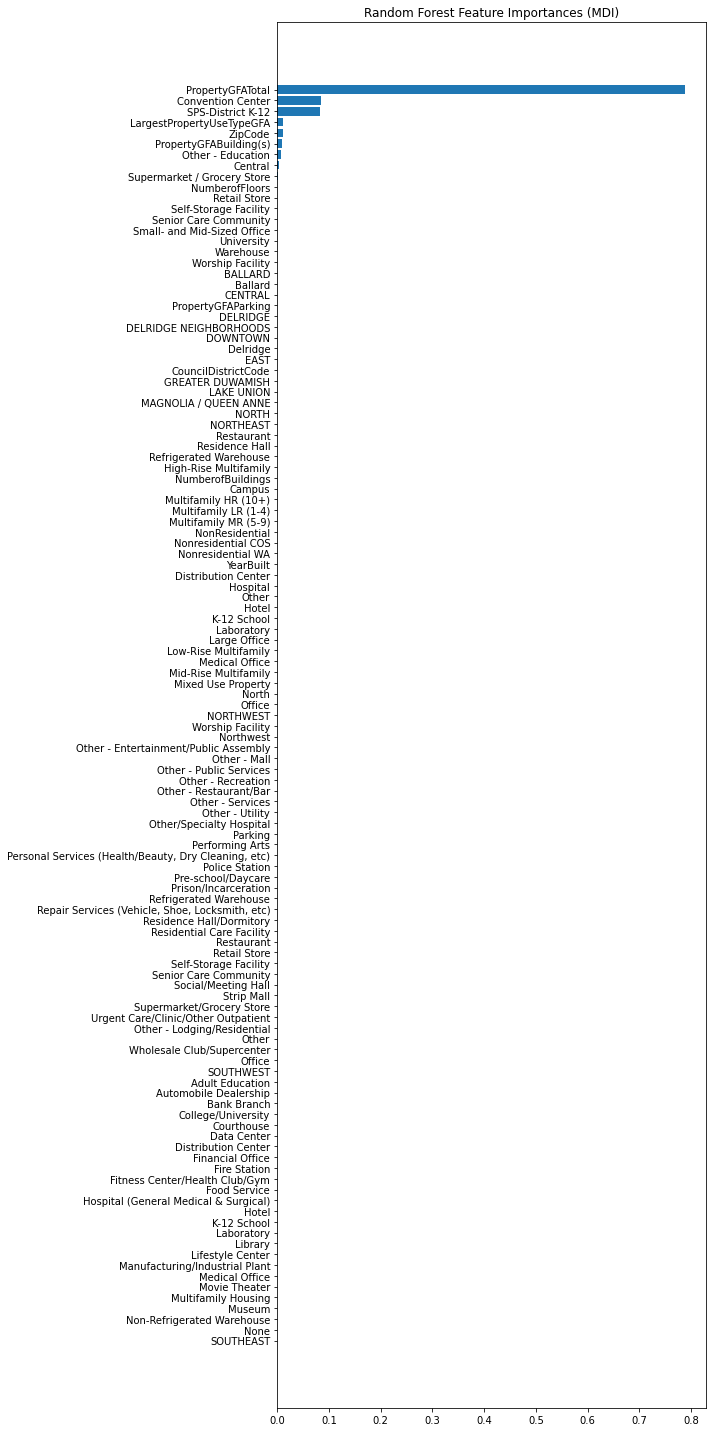

In [ ]:
import pylab as plt
tree_feature_importances = (
    rf.feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

# useful links and methods and functions I used: 

```df.dropna()``` to remove observation with missing variables

```df.drop(columns, axis=1)``` to remove features (columns)


```np.log10()``` and ```np.isinf()``` to convert to log space and find infinite values  


one hot encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/


KNN imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html , https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/, and 
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/  